<a href="https://colab.research.google.com/github/ismailakbas/CS304-Introduction-to-Machine-Learning-and-Artificial-Intelligence/blob/main/cs304_bonus_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given the data points in 2D space:
(1,1),(2,2)and (3,3),
a)What is the first principle component?
Follow the steps in the lecture slides on dimensionality reduction (slide 50).(subtract the mean, calculate the covariance matrix, find the eigenvectors etc.)

b)Project the data onto 1D space given by the first principle component, what is thevariance of the projected data?

c)For the projected data in (b),now if we represent them in the original 2D space, what
is the reconstruction error?

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

kordinatlar = np.array([[0, 0], [1, 1], [2, 2]])
print(kordinatlar)

[[0 0]
 [1 1]
 [2 2]]


Part a
**Determine the first principal component** from slide 50


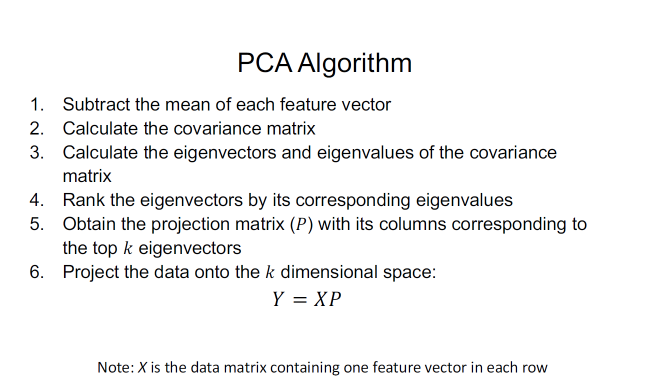

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import os

image_path = "/content/drive/MyDrive/CS304/slide50.png"

image = cv2.imread(image_path)
assert image is not None, "Görüntü yüklenemedi."

down = 0.5
scaled = cv2.resize(image, None, fx=down, fy=down, interpolation=cv2.INTER_LINEAR)

cv2_imshow(scaled)


Apply each steps

In [ ]:
import numpy as np

coordinates = np.array([[0, 0], [1, 1], [2, 2]])


mean_vector = np.mean(coordinates, axis=0)
print("Mean Vector (mean_vector):")
print(mean_vector)

centered_coordinates = coordinates - mean_vector
print("\nCentered Coordinates (centered_coordinates):")
print(centered_coordinates)


covariance_matrix = np.matmul(centered_coordinates.T, centered_coordinates) / (coordinates.shape[0] - 1)
print("\nCovariance Matrix (covariance_matrix):")
print(covariance_matrix)


eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\nEigenvalues (eigenvalues):")
print(eigenvalues)
print("\nEigenvectors (eigenvectors):")
print(eigenvectors)


idx = np.argsort(-eigenvalues)
print("\nIndices of Eigenvalues in Descending Order (idx):")
print(idx)

sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

print("\nSorted Eigenvalues (sorted_eigenvalues):")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors (sorted_eigenvectors):")
print(sorted_eigenvectors)


Mean Vector (mean_vector):
[1. 1.]

Centered Coordinates (centered_coordinates):
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]

Covariance Matrix (covariance_matrix):
[[1. 1.]
 [1. 1.]]

Eigenvalues (eigenvalues):
[2. 0.]

Eigenvectors (eigenvectors):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Indices of Eigenvalues in Descending Order (idx):
[0 1]

Sorted Eigenvalues (sorted_eigenvalues):
[2. 0.]

Sorted Eigenvectors (sorted_eigenvectors):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Project the data onto 1D space given by the first principle component, what is thevariance of the projected data



In [ ]:

projected_data = np.dot(centered_coordinates, sorted_eigenvectors[:, 0])

print("Projected data:")
print(projected_data)

variance = np.var(projected_data, ddof=1)

print("Variance of the projected data:")
print(variance)


Projected data:
[-1.41421356  0.          1.41421356]
Variance of the projected data:
1.9999999999999996


c)For the projected data in (b),now if we represent them in the original 2D space, what is the reconstruction error?

In [ ]:

reconstructed_data = np.outer(projected_data, sorted_eigenvectors[:, 0])

print("Reconstructed data (2nd code):")
print(reconstructed_data)

reconstruction_error = np.sum((centered_coordinates - reconstructed_data) ** 2)

print("Reconstruction error (2nd code):")
print(reconstruction_error)


Reconstructed data (2nd code):
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]
Reconstruction error (2nd code):
1.9721522630525295e-31


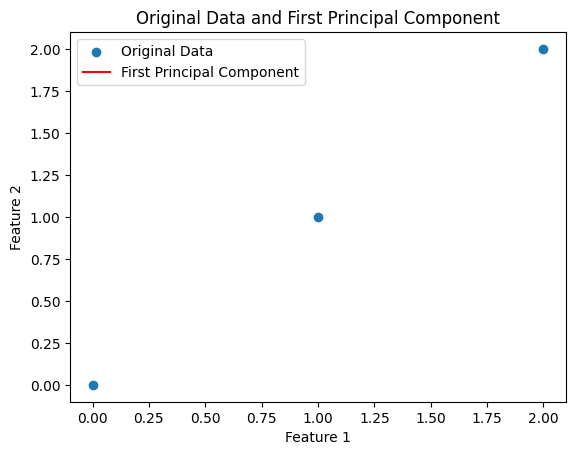

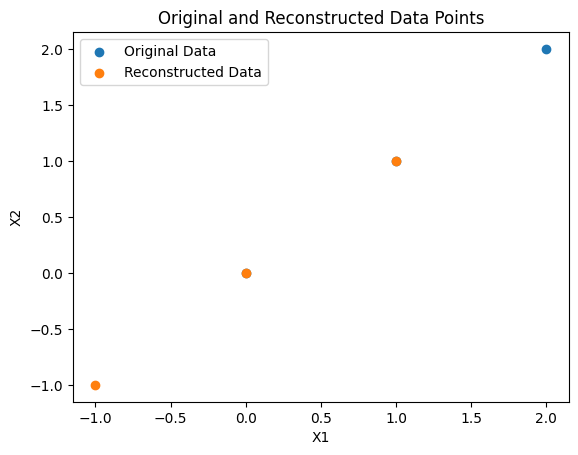

Variance of projected data: 1.9999999999999996
Reconstruction error: 1.9721522630525295e-31


In [ ]:
import matplotlib.pyplot as plt


plt.scatter(coordinates[:, 0], coordinates[:, 1], label='Original Data')
plt.plot(sorted_eigenvectors[:, 0] * sorted_eigenvalues[0], sorted_eigenvectors[:, 1] * sorted_eigenvalues[1], label='First Principal Component', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original Data and First Principal Component')
plt.show()


plt.scatter(coordinates[:, 0], coordinates[:, 1], label='Original Data')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

plt.legend()
plt.title('Original and Reconstructed Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

print("Variance of projected data:", variance)
print("Reconstruction error:", reconstruction_error)


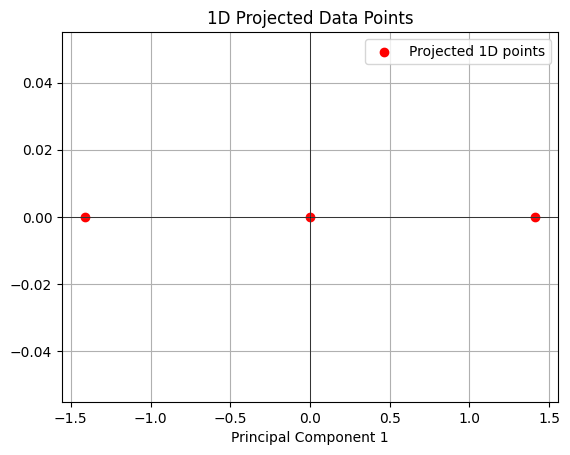

In [ ]:
# Plot the projected 1D data points
plt.scatter(projected_data, np.zeros_like(projected_data), color='red', label='Projected 1D points')
plt.xlabel('Principal Component 1')
plt.title('1D Projected Data Points')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.show()
